## Exploratory Data Analysis

In [18]:
import pandas as pd

# reading csv as a dataframe
df = pd.read_csv('ExoClick_challenge.csv')
print('Shape of data:',df.shape)
print('Shape of data if missing values are to be dropped:', df.dropna().shape)

('Shape of data:', (96223, 6))
('Shape of data if missing values are to be dropped:', (96213, 6))


In [19]:
# Finding the unique values; Data Pre-Processing in case of redundancy;
print('Unique countries:',df['country'].unique())
print('Unique ad_type:',df['ad_type'].unique(), '\n')

# Check for missing data
print('Checking for attribute with missing values: \n',df.isna().any())

('Unique countries:', array(['EST', 'NCL', 'DZA', 'ISL', 'isl', 'dza', 'est', 'ncl'],
      dtype=object))
('Unique ad_type:', array([10, 17,  2, 15]), '\n')
('Checking for attribute with missing values: \n', dattime        False
client         False
country        False
ad_type        False
impressions    False
value           True
dtype: bool)


In [20]:
# dropping missing values as insignificant number of them are present
df = df.dropna()
print('Dataframe view after removing missing values\n',df.head(5))

# rows with redundant country codes 
print('\n','Rows with redundant Country Codes')
print(df[df['country']=='isl'])
print(df[df['country']=='dza'])
print(df[df['country']=='est'])
print(df[df['country']=='ncl'])

('Dataframe view after removing missing values\n',                dattime  client country  ad_type  impressions    value
0  2016-06-06*06:00:00       1     EST       10          137   0.1370
1  2016-06-12*22:00:00       2     NCL       10         4424  91.7207
2  2016-06-05*20:00:00       1     DZA       10          271   0.2710
3  2016-06-23*17:00:00       1     EST       17            1   0.0010
4  2016-06-02*10:00:00       3     DZA       10        11701   4.8719)
('\n', 'Rows with redundant Country Codes')
                   dattime  client country  ad_type  impressions   value
624    2016-06-16*07:00:00       9     isl        2           89  0.4894
6397   2016-06-03*23:00:00      25     isl        2          129  0.6450
15119  2016-06-11*10:00:00       3     isl       17            7  0.0049
30699  2016-06-01*14:00:00      13     isl        2           94  0.0000
                   dattime  client country  ad_type  impressions   value
768    2016-06-25*14:00:00      23     dza    

In [21]:
# converting the countries with lower case to upper case
row_numbers_to_process = []
row_numbers_to_process.extend(df[df['country']=='isl'].index)
row_numbers_to_process.extend(df[df['country']=='dza'].index)
row_numbers_to_process.extend(df[df['country']=='est'].index)
row_numbers_to_process.extend(df[df['country']=='ncl'].index)

for num in row_numbers_to_process:
    df.loc[num,'country'] = df.loc[num,'country'].upper()
    
print('Unique Countries after Processing:', df['country'].unique())

('Unique Countries after Processing:', array(['EST', 'NCL', 'DZA', 'ISL'], dtype=object))


In [22]:
# computing summary statistics
print('Shape of Dataset',df.shape)
print(df.describe())

('Shape of Dataset', (96213, 6))
             client       ad_type    impressions         value
count  96213.000000  96213.000000   96213.000000  96213.000000
mean      16.665004      6.642190    4045.791535      4.002480
std       14.327285      5.593171   31902.587268     15.084129
min        1.000000      2.000000       1.000000      0.000000
25%        4.000000      2.000000       7.000000      0.020100
50%       13.000000      2.000000      42.000000      0.140000
75%       25.000000     10.000000     379.000000      1.104600
max       73.000000     17.000000  941289.000000    846.000000


Frequency of ad_types



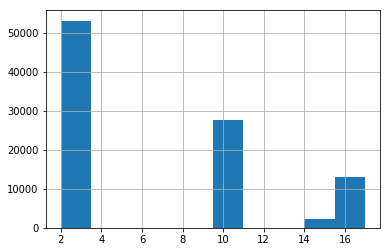

In [78]:
print('Frequency of ad_types\n')
df['ad_type'].hist();

Country frequency


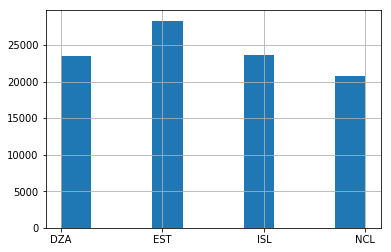

In [81]:
print('Country frequency')
df['country'].hist();

## Computing eCPM

In [82]:
# computing eCPM for each segment given by a country and ad_type
ecpm_df = df.groupby(['country', 'ad_type']).sum()
ecpm_df['eCPM'] = ''
ecpm_df['eCPM'] = (ecpm_df['value']*1000)/(ecpm_df['impressions'])
print(ecpm_df[['impressions','value','eCPM']])

                 impressions       value       eCPM
country ad_type                                    
DZA     2          209732533  64402.8197   0.307071
        10          99589395  49136.4866   0.493391
        15             36051     48.1423   1.335394
        17            288743    130.5920   0.452278
EST     2           30512420  85804.5274   2.812118
        10          14598906  40917.6501   2.802789
        15             22860     23.7174   1.037507
        17             83608    199.4982   2.386114
ISL     2           15694168  14342.6641   0.913885
        10           6366502  12074.8048   1.896615
        15              5117      6.6349   1.296639
        17             58403    104.9812   1.797531
NCL     2            7764619  66507.4754   8.565453
        10           4481430  51331.6085  11.454292
        15              5546     16.7132   3.013559
        17             17440     42.2456   2.422339


This clearly allows us to infer that 'NCL' is the country with highest eCPM fr the ad_type 10. We can also draw some other concusions such as-
- In almost all countries, ad_type 2 is having the highest impressions followed by ad_type 10
- The country 'NCL' shows significantly higher levels of eCPM values for all values of ad_type

In [24]:
# creating a dataframe with separate rows for date and time for ease of dataprocessing
date_time = pd.DataFrame(df['dattime'].str.split('*',1).tolist(),
                                   columns = ['date','time'])
df['date'] = date_time['date']
df['time'] = date_time['time']
df = df.drop(['dattime'], axis=1)
df = df[['date', 'time', 'client', 'country', 'ad_type', 'impressions', 'value']]
df.head(5)

,date,time,client,country,ad_type,impressions,value
0,2016-06-06,06:00:00,1,EST,10,137,0.1370
1,2016-06-12,22:00:00,2,NCL,10,4424,91.7207
2,2016-06-05,20:00:00,1,DZA,10,271,0.2710
3,2016-06-23,17:00:00,1,EST,17,1,0.0010
4,2016-06-02,10:00:00,3,DZA,10,11701,4.8719


## Daily Time Series

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# hourly time series including the dates
NCL_df = df[df['country']=='NCL']
NCL_df['date'] = pd.to_datetime(NCL_df['date'], format='%Y-%m-%d')
NCL_df = NCL_df.drop(['time'], axis=1)
NCL_df = NCL_df[['date', 'client', 'country', 'ad_type', 'impressions',
                'value']]
NCL_df = NCL_df.sort_values(by= ['date'])
NCL_df = NCL_df.dropna()
NCL_df = NCL_df.groupby(['ad_type', 'date']).sum()
NCL_df['eCPM'] = ''
NCL_df['eCPM'] = (NCL_df['value']*1000)/(NCL_df['impressions'])
NCL_df = NCL_df.reset_index()
NCL_df.set_index('date', inplace=True)

In [61]:
# dataframes based on specific ad_types
NCL_02_df = NCL_df[NCL_df['ad_type']== 2]
NCL_10_df = NCL_df[NCL_df['ad_type']==10]
NCL_15_df = NCL_df[NCL_df['ad_type']==15]
NCL_17_df = NCL_df[NCL_df['ad_type']==17]

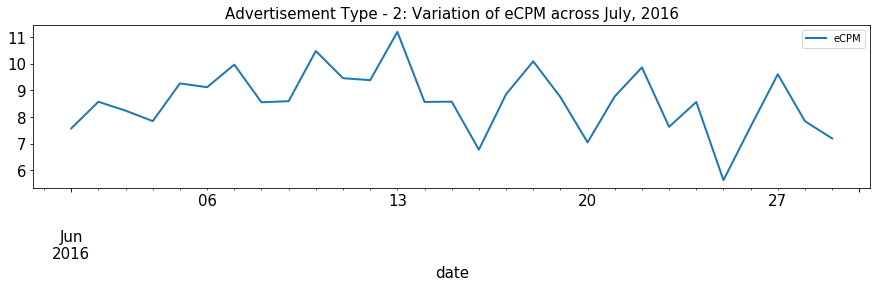

In [55]:
NCL_02_df[['eCPM']].plot(figsize=(15,3), linewidth=2, fontsize=15)
plt.xlabel('date', fontsize=15);
plt.title('Advertisement Type - 2: Variation of eCPM across July, 2016', fontsize=15);

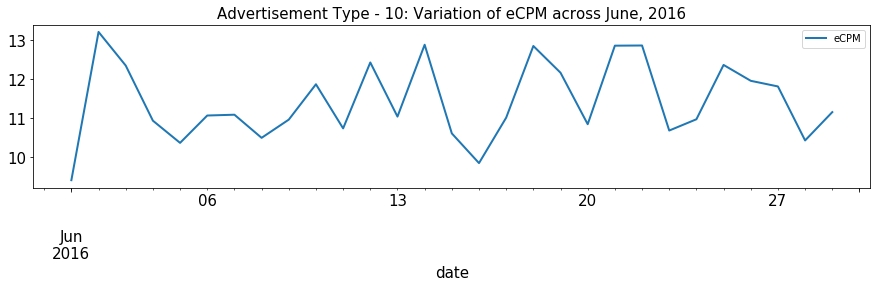

In [56]:
NCL_10_df[['eCPM']].plot(figsize=(15,3), linewidth=2, fontsize=15)
plt.xlabel('date', fontsize=15);
plt.title('Advertisement Type - 10: Variation of eCPM across June, 2016', fontsize=15);

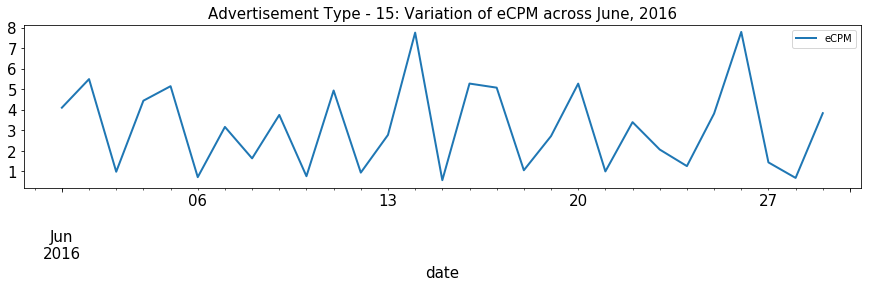

In [57]:
NCL_15_df[['eCPM']].plot(figsize=(15,3), linewidth=2, fontsize=15)
plt.xlabel('date', fontsize=15);
plt.title('Advertisement Type - 15: Variation of eCPM across June, 2016', fontsize=15);

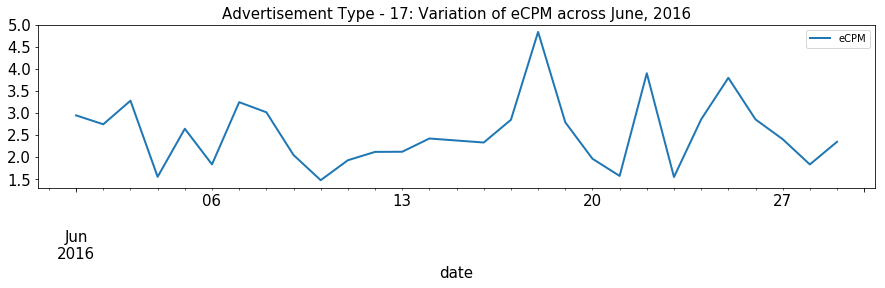

In [62]:
NCL_17_df[['eCPM']].plot(figsize=(15,3), linewidth=2, fontsize=15)
plt.xlabel('date', fontsize=15);
plt.title('Advertisement Type - 17: Variation of eCPM across June, 2016', fontsize=15);

Clearly, we can draw certain conclusions from the information received so far from the specific ad_type time series plots regarding the variation of the metric eCMP. Some of them are listed below-
* Advertisement Type 2- The highest value of eCPM occurs on 13th of June, 2016. Some relatively high values of the eCPM are also observed on 10th of June, 2016 and 18th of June, 2016.
* Advertisement Type 10- The highest value of eCPM occurs on 2nd of June, 2016
* Advertisement Type 15- It has a more seasonal behaviour with crests and troughs occuring routinely. The highest value of eCPM is attained on 14th of June and 26th of June, 2016
* Advertisement Type 17- We can infer that the highest cost of eCPM arises on 18th of June, 2016 which continues to go through smaller crests and falls. The other important high values of eCPM occur on 3rd of June, 7th of June, 22nd of June, 25th of June


## Hourly Time Series

In [33]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [34]:
# hourly time series excluding the dates
DZA_df = df[df['country']=='DZA']
DZA_df['time'] = pd.to_datetime(DZA_df['time'], format='%H:%M:%S').dt.hour
DZA_df = DZA_df.drop(['date'], axis=1)
DZA_df = DZA_df[['time', 'client', 'country', 'ad_type', 'impressions',
                'value']]
DZA_df = DZA_df.sort_values(by= ['time'])
DZA_df = DZA_df.dropna()
DZA_df = DZA_df.groupby(['ad_type', 'time']).sum()
DZA_df['eCPM'] = ''
DZA_df['eCPM'] = (DZA_df['value']*1000)/(DZA_df['impressions'])
DZA_df = DZA_df.reset_index()
DZA_df.set_index('time', inplace=True)

In [35]:
# dataframes based on ad_types
DZA_02_df = DZA_df[DZA_df['ad_type']== 2]
DZA_10_df = DZA_df[DZA_df['ad_type']==10]
DZA_15_df = DZA_df[DZA_df['ad_type']==15]
DZA_17_df = DZA_df[DZA_df['ad_type']==17]

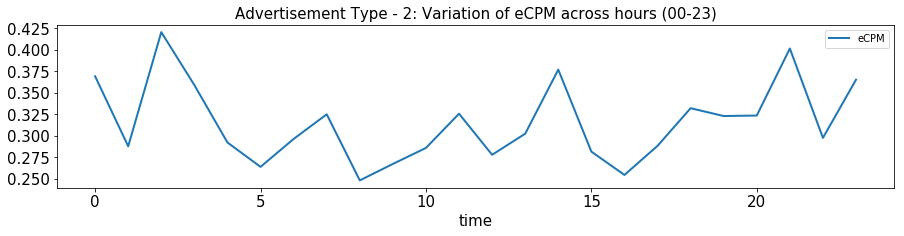

In [36]:
DZA_02_df[['eCPM']].plot.line(figsize=(15,3), linewidth=2, fontsize=15)
plt.xlabel('time', fontsize=15);
plt.title('Advertisement Type - 2: Variation of eCPM across hours (00-23)', fontsize=15);

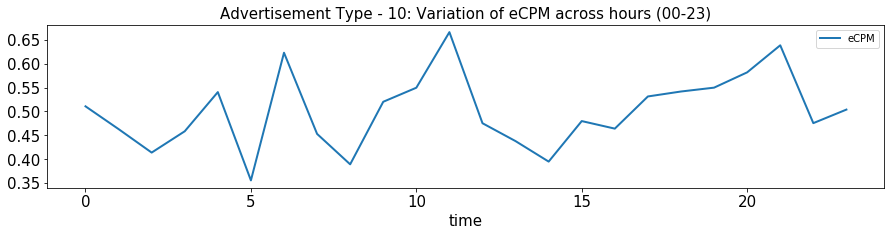

In [37]:
DZA_10_df[['eCPM']].plot.line(figsize=(15,3), linewidth=2, fontsize=15)
plt.xlabel('time', fontsize=15);
plt.title('Advertisement Type - 10: Variation of eCPM across hours (00-23)', fontsize=15);

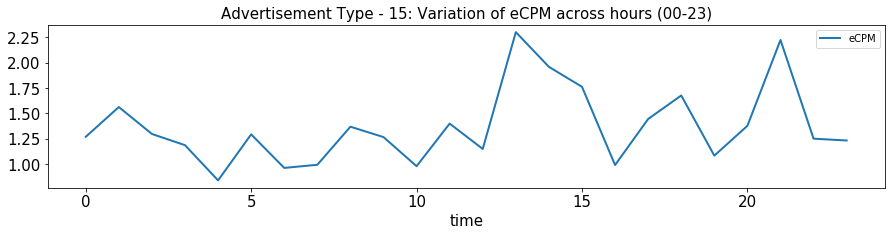

In [38]:
DZA_15_df[['eCPM']].plot.line(figsize=(15,3), linewidth=2, fontsize=15)
plt.xlabel('time', fontsize=15);
plt.title('Advertisement Type - 15: Variation of eCPM across hours (00-23)', fontsize=15);

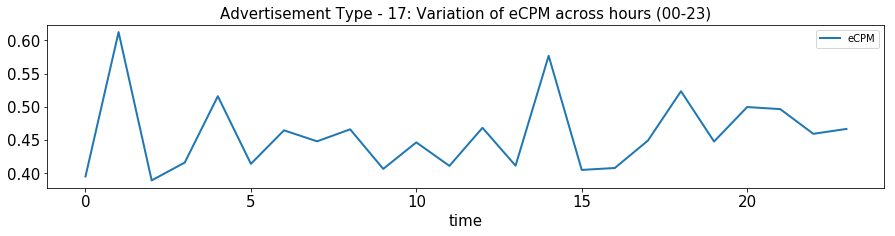

In [39]:
DZA_17_df[['eCPM']].plot.line(figsize=(15,3), linewidth=2, fontsize=15)
plt.xlabel('time', fontsize=15);
plt.title('Advertisement Type - 17: Variation of eCPM across hours (00-23)', fontsize=15);

Clearly, we can draw certain conclusions from the information received so far from the specific ad_type time series plots regarding the variation of the metric eCMP. Some of them are listed below-
* Advertisement Type 2- The highest value of eCPM is attained at 0200 hours in night. Some relatively high values of the eCPM are also achieved at 1400 hours and 2100 hours.
* Advertisement Type 10- The highest value of eCPM is achieved at 1100 hours in the morning with comparatively smaller yet significantly high values attained also at 0600 hours in morning and 2100 hours in night
* Advertisement Type 15- The highest value of eCPM is attained at 1300 hours in afternoon and 2100 hours in night
* Advertisement Type 17- We can infer that the highest cost of eCPM arises at 0100 hours in night which continues to go through smaller crests and falls till it again reaches a significant high value at around 1400 hours in the afternoon. 


Now, we have decided to generate an overview of how the time series will look if both the date and time as unique factors will be retained and the dataframe sorted based on both the factors. The four plots following the 2 sections of code have implemented this feature

In [49]:
# hourly time series including the dates
DZA_df = df[df['country']=='DZA']
DZA_df['datetime'] = pd.to_datetime(DZA_df['date'] + ' ' + DZA_df['time'])
DZA_df = DZA_df.drop(['date','time'], axis=1)
DZA_df = DZA_df[['datetime', 'client', 'country', 'ad_type', 'impressions',
                'value']]
DZA_df = DZA_df.sort_values(by= ['datetime'])
DZA_df = DZA_df.dropna()
DZA_df = DZA_df.groupby(['ad_type', 'datetime']).sum()
DZA_df['eCPM'] = ''
DZA_df['eCPM'] = (DZA_df['value']*1000)/(DZA_df['impressions'])
DZA_df = DZA_df.reset_index()
DZA_df.set_index('datetime', inplace=True)

In [50]:
# dataframes based on ad_types
DZA_02_df = DZA_df[DZA_df['ad_type']== 2]
DZA_10_df = DZA_df[DZA_df['ad_type']==10]
DZA_15_df = DZA_df[DZA_df['ad_type']==15]
DZA_17_df = DZA_df[DZA_df['ad_type']==17]

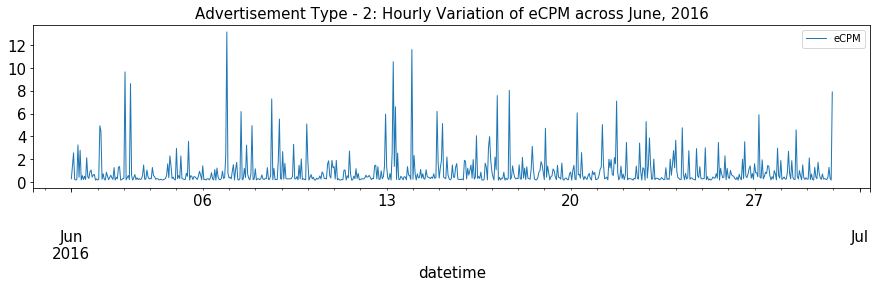

In [51]:
DZA_02_df[['eCPM']].plot.line(figsize=(15,3), linewidth=1, fontsize=15)
plt.xlabel('datetime', fontsize=15);
plt.title('Advertisement Type - 2: Hourly Variation of eCPM across June, 2016', fontsize=15);

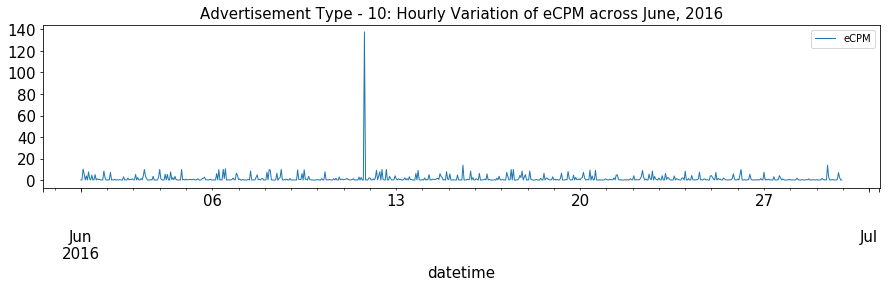

In [43]:
DZA_10_df[['eCPM']].plot.line(figsize=(15,3), linewidth=1, fontsize=15)
plt.xlabel('datetime', fontsize=15);
plt.title('Advertisement Type - 10: Hourly Variation of eCPM across June, 2016', fontsize=15);

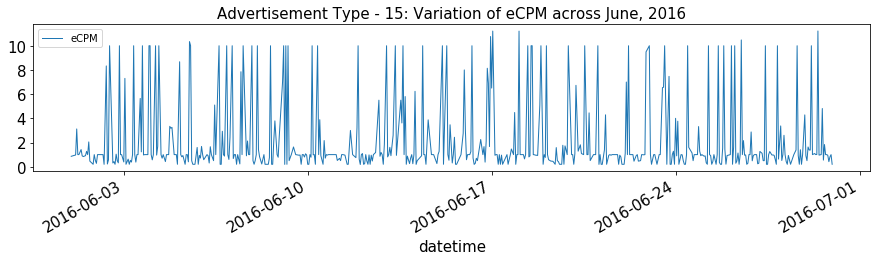

In [44]:
DZA_15_df[['eCPM']].plot.line(figsize=(15,3), linewidth=1, fontsize=15)
plt.xlabel('datetime', fontsize=15);
plt.title('Advertisement Type - 15: Variation of eCPM across June, 2016', fontsize=15);

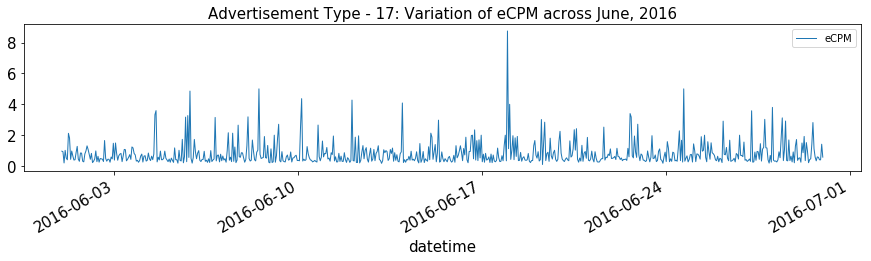

In [45]:
DZA_17_df[['eCPM']].plot.line(figsize=(15,3), linewidth=1, fontsize=15)
plt.xlabel('datetime', fontsize=15);
plt.title('Advertisement Type - 17: Variation of eCPM across June, 2016', fontsize=15);

## Forecasting using a Time Series Model
In this segment, we are demonstrating the idea that we can create forecasts for eCPM using the ad_type specific dataframes created for a particular country. In total, we may need 16 time series models to accurately capture the eCPM values for each of the 4 specific ad_type and 4 specific countries. We are demonstrating for NCL with ad_type 2. 

In [111]:
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from math import sqrt
from matplotlib import pyplot

('Variance of original series:', eCPM    1.421153
dtype: float64)
('Variance of differenced series', eCPM    2.390404
dtype: float64)


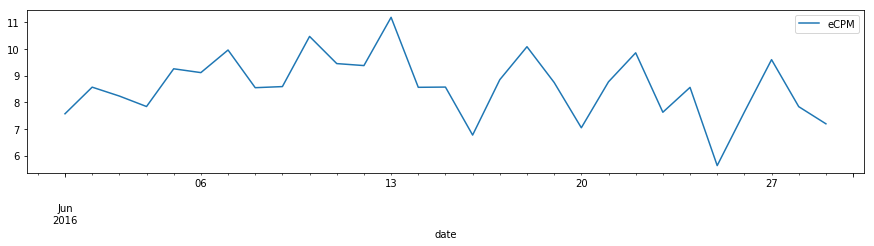

In [148]:
# visualisation
series = NCL_02_df[['eCPM']]
series.plot(figsize=(15,3))
# univariate series
print('Variance of original series:',series.var());
print('Variance of differenced series',series.diff().var());

As we can clearly see, the series do not have any visible trend. A pattern of seasonality may appear but visibly, it doesn't seem so. Further, the variance of the series also looks pretty fine with little increase as the series progresses. However, at this stage, we will restrict ourselves from taking a logarithmic or square root transformation.

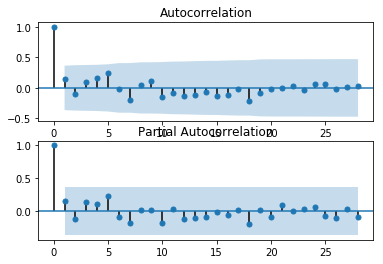

In [146]:
# examination of acf and pacf
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

Both ACF and PACF are not showing any significant lags. We may start with p=0, q=0. Although, we may directly plug in these values n an ARIMA model but it would be better if we perform grid search to further develop some idea.


In [121]:
# Grid search to confirm the chosen model paramters
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        # model_fit = model.fit(disp=0)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=4.836
ARIMA(0, 0, 2) RMSE=4.231
ARIMA(0, 0, 3) RMSE=2.741
ARIMA(0, 1, 1) RMSE=1.469
ARIMA(0, 2, 1) RMSE=1.740
ARIMA(1, 0, 0) RMSE=1.710
ARIMA(1, 1, 0) RMSE=1.737
ARIMA(1, 2, 0) RMSE=2.433
ARIMA(2, 1, 0) RMSE=1.736
ARIMA(2, 2, 0) RMSE=2.421
ARIMA(3, 1, 0) RMSE=1.696
ARIMA(4, 0, 0) RMSE=2.276
ARIMA(4, 1, 0) RMSE=1.634
Best ARIMA(0, 1, 1) RMSE=1.469


In [138]:
warnings.filterwarnings('ignore')

# intentionally training on first 25 days and testing on last 15 days due to lack of data
train, test = series[['eCPM']].values[0:25], series[['eCPM']].values[15:29]

# fit model
model = ARIMA(train, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   24
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -39.667
Method:                       css-mle   S.D. of innovations              1.239
Date:                Sat, 20 Oct 2018   AIC                             85.334
Time:                        14:03:49   BIC                             88.868
Sample:                             1   HQIC                            86.271
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0321      0.066     -0.487      0.631      -0.161       0.097
ma.L1.D.y     -0.7814      0.227     -3.446      0.002      -1.226      -0.337
                                    Roots           

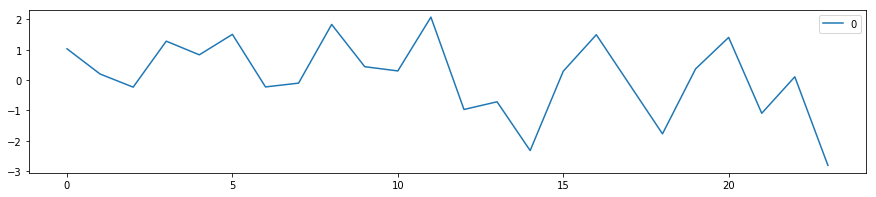

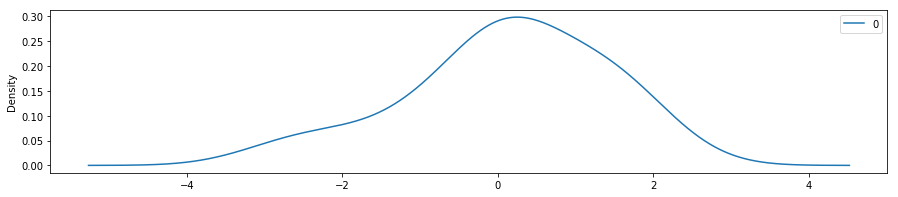

               0
count  24.000000
mean    0.114608
std     1.270540
min    -2.817981
25%    -0.355763
50%     0.244304
75%     1.093785
max     2.076164


In [142]:
# plot residual errors

residuals = DataFrame(model_fit.resid)
residuals.plot(figsize=(15,3))
pyplot.show()
residuals.plot(kind='kde', figsize=(15,3))
pyplot.show()
print(residuals.describe())

The residuals, although not exactly following normality as we may expect, however, they are somewhat resembling.

In [122]:
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.extend(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=7.798187, expected=6.773410
predicted=7.280596, expected=8.850637
predicted=7.853268, expected=10.087144
predicted=8.271701, expected=8.746229
predicted=8.355729, expected=7.046965
predicted=8.211132, expected=8.770722
predicted=8.201925, expected=9.858574
predicted=8.352102, expected=7.629319
predicted=8.310149, expected=8.561703
predicted=8.293146, expected=5.628232
predicted=8.045681, expected=7.637763
predicted=7.915104, expected=9.602250
predicted=8.014216, expected=7.838834
predicted=8.012606, expected=7.195957
Test MSE: 1.779


In [123]:
# compute predictions dataframe
predictions = pd.DataFrame({'predictions':predictions})
true = [true for true in series['eCPM'][15:29].values]
predictions['dates'] = date
predictions['true'] = true
predictions = predictions[['dates', 'true','predictions']]
predictions.set_index('dates', inplace=True)

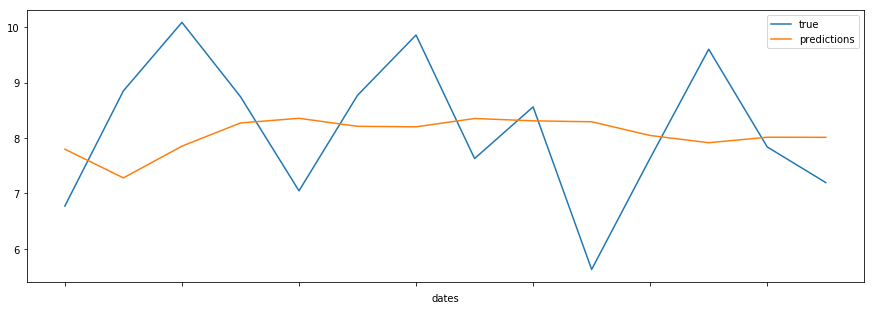

In [124]:
# plot predictions
predictions.plot(figsize=(15,5))

Under this analysis, our idea was to develop one model for each of the advertisement_types for each of the countries as they seems to be following significantly different behaviour from each other as exhibited from their previous plots.

Although, our prediction model seems to be not significantly precise in terms of forecasting the eCPM metric but it hs successfully captured the behaviour in an approximate manner. The values seems to be showing an average of the crests and troughs. A more complex model may be able to capture the specific features but a better remedy would be use several months data and compare the trend and seasonality accordingly. Such metrics often see fluctuations as observed across a year.

LSTM models may also be employed to fit the time series data. However, again, such models need extensively large amount of data.